In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# v1

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Caminho das pastas
train = '/content/drive/MyDrive/RV/Projeto/train'
val = '/content/drive/MyDrive/RV/Projeto/val'
test = '/content/drive/MyDrive/RV/Projeto/test'

# Geradores de dados para carregamento das imagens
datagen_treino = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen_val = ImageDataGenerator(rescale=1.0/255)
datagen_teste = ImageDataGenerator(rescale=1.0/255)

# Dados de treinamento
treino_generator = datagen_treino.flow_from_directory(
    train,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    shuffle=True  # Isso evita repetição de dados em batches consecutivos
)

# Dados de validação
val_generator = datagen_val.flow_from_directory(
    val,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    shuffle=False  # Para manter os dados consistentes durante a validação
)

# Dados de teste
teste_generator = datagen_teste.flow_from_directory(
    test,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)


Found 5236 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense

# modelo = Sequential([
#     Input(shape=(150, 150, 3)),
#     Conv2D(32, (3, 3), activation='relu'),
#     MaxPooling2D(2, 2),

#     Conv2D(64, (3, 3), activation='relu'),
#     MaxPooling2D(2, 2),

#     Conv2D(128, (3, 3), activation='relu'),
#     MaxPooling2D(2, 2),

#     Flatten(),
#     Dense(128, activation='relu'),
#     Dense(1, activation='sigmoid')
# ])

# modelo.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
from tensorflow.keras.layers import Dropout

modelo = Sequential([
    Input(shape=(150, 150, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.25),  # Evita overfitting

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.5),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.metrics import AUC

modelo.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', AUC()])


reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=1e-6,
    verbose=1
)




In [ ]:
steps_per_epoch = treino_generator.samples // treino_generator.batch_size
validation_steps = val_generator.samples // val_generator.batch_size



# historia = modelo.fit(
#     treino_generator,
#     steps_per_epoch=treino_generator.samples // 32,
#     epochs=10,
#     validation_data=val_generator,
#     validation_steps=val_generator.samples // 32
# )

historia = modelo.fit(
    treino_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=10,
    validation_data=val_generator,
    validation_steps=validation_steps
)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


163/163 ━━━━━━━━━━━━━━━━━━━━ 800s 5s/step - accuracy: 0.7150 - auc: 0.5239 - loss: 0.7602 - val_accuracy: 0.5000 - val_auc: 0.8125 - val_loss: 0.6845
Epoch 2/10
  1/163 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.7500 - auc: 0.7057 - loss: 0.5270

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7500 - auc: 0.7057 - loss: 0.5270 - val_accuracy: 0.5000 - val_auc: 0.8438 - val_loss: 0.6872
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 93s 549ms/step - accuracy: 0.7423 - auc: 0.7415 - loss: 0.4995 - val_accuracy: 0.5625 - val_auc: 0.8125 - val_loss: 0.6974
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7188 - auc: 0.8250 - loss: 0.5001 - val_accuracy: 0.5625 - val_auc: 0.8516 - val_loss: 0.6954
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 94s 555ms/step - accuracy: 0.7646 - auc: 0.8081 - loss: 0.4537 - val_accuracy: 0.5625 - val_auc: 0.7969 - val_loss: 0.6556
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9375 - auc: 0.8889 - loss: 0.2588 - val_accuracy: 0.5625 - val_auc: 0.7969 - val_loss: 0.6420
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 141s 555ms/step - accuracy: 0.7755 - auc: 0.8219 - loss: 0.4441 - val_accuracy: 0.6250 - val_auc: 0.8906 - val_loss: 0.6199
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 0

In [ ]:
# teste_loss, teste_acc = modelo.evaluate(teste_generator, steps=teste_generator.samples // 32)
# print(f"Precisão no conjunto de teste: {teste_acc * 100:.2f}%")

results = modelo.evaluate(teste_generator, steps=teste_generator.samples // 32)
print(f"Loss no conjunto de teste: {results[0]:.4f}")
print(f"Precisão no conjunto de teste: {results[1] * 100:.2f}%")


19/19 ━━━━━━━━━━━━━━━━━━━━ 283s 16s/step - accuracy: 0.6907 - auc: 0.7518 - loss: 0.6291
Loss no conjunto de teste: 0.6053
Precisão no conjunto de teste: 69.57%


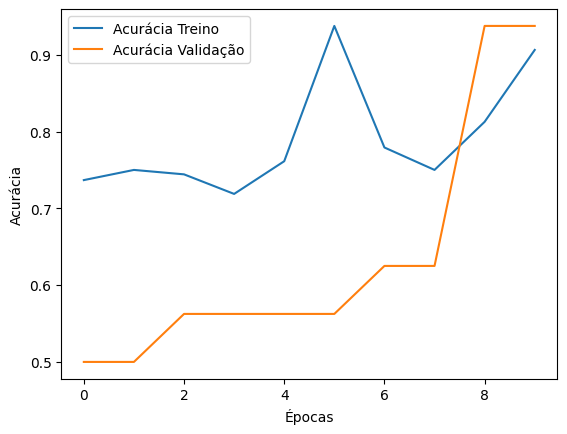

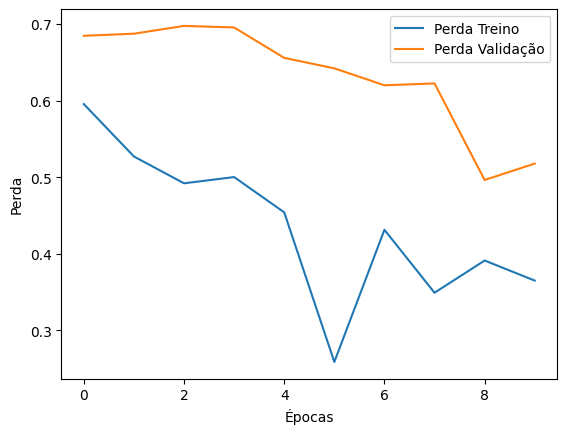

In [ ]:
import matplotlib.pyplot as plt

# Precisão
plt.plot(historia.history['accuracy'], label='Acurácia Treino')
plt.plot(historia.history['val_accuracy'], label='Acurácia Validação')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()
plt.show()

# Perda
plt.plot(historia.history['loss'], label='Perda Treino')
plt.plot(historia.history['val_loss'], label='Perda Validação')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()
plt.show()


20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 324ms/step


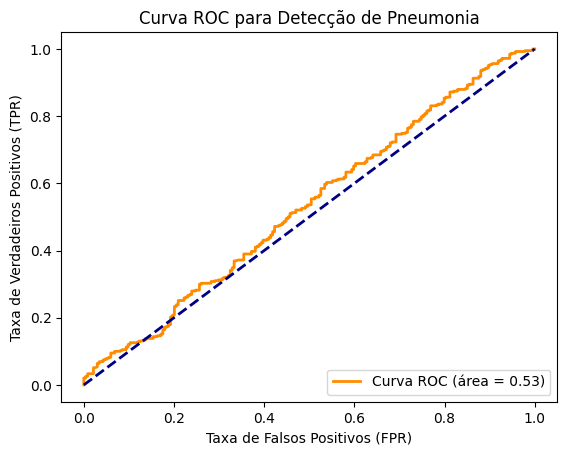

Relatório de Classificação:
               precision    recall  f1-score   support

      Normal       0.46      0.18      0.26       234
   Pneumonia       0.64      0.87      0.74       390

    accuracy                           0.61       624
   macro avg       0.55      0.53      0.50       624
weighted avg       0.57      0.61      0.56       624



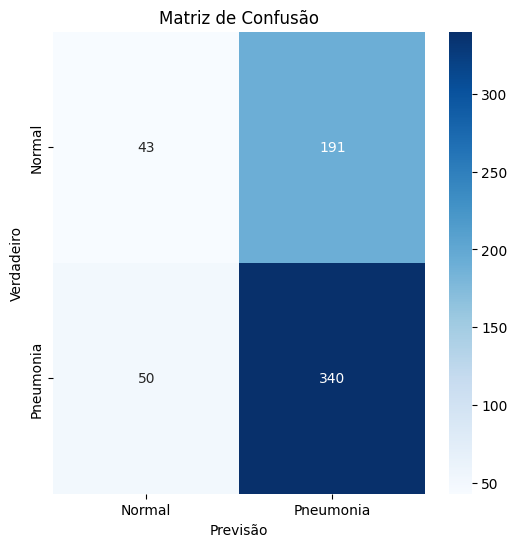

Precisão: 0.64, Revocação: 0.87, F1-Score: 0.74
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 684ms/step


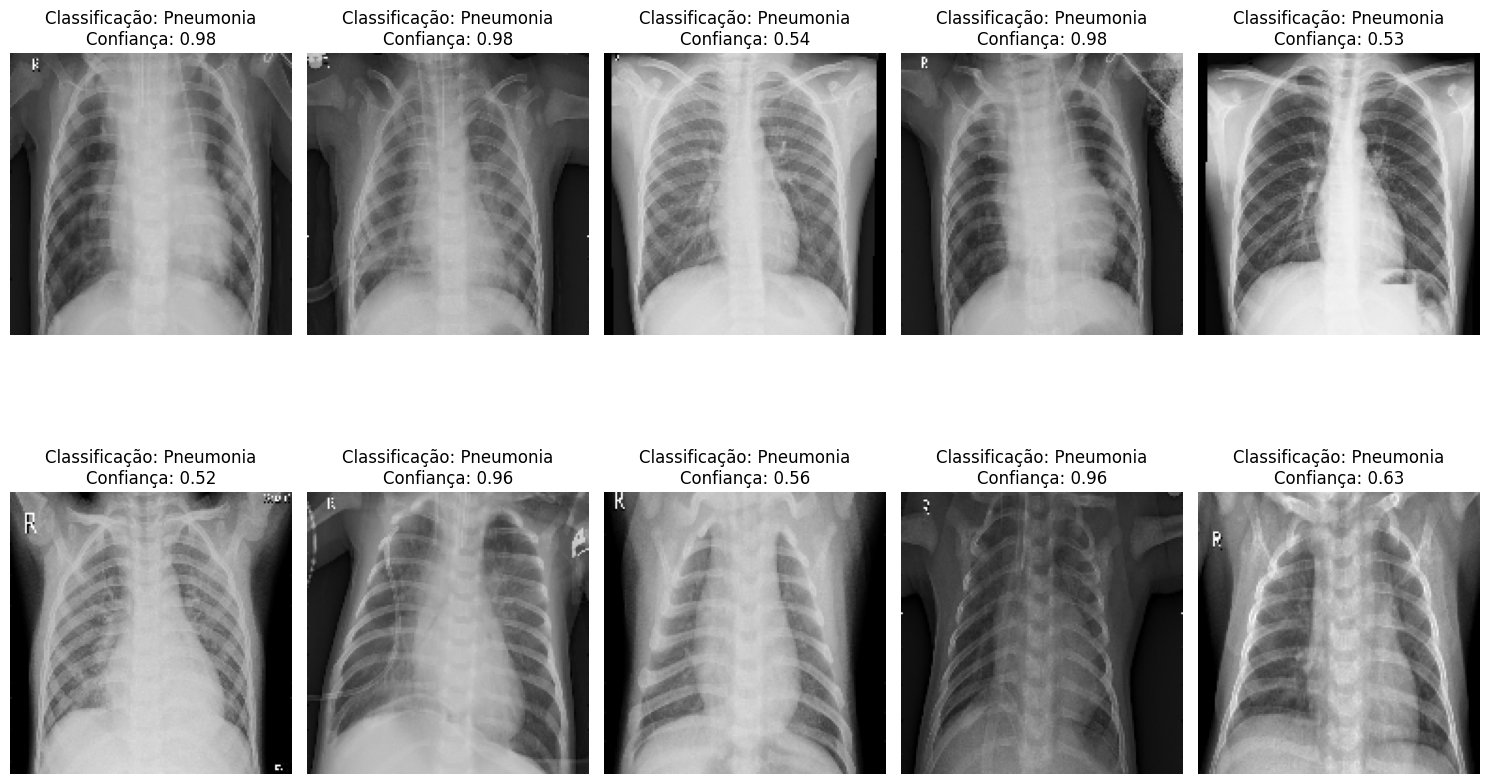

In [ ]:
import numpy as np
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# 1. Previsões no conjunto de teste
y_prob = modelo.predict(teste_generator)
y_pred = np.round(y_prob).astype(int).reshape(-1)  # Convertendo para classes 0 e 1
y_true = teste_generator.classes  # Labels reais

# 2. Curva ROC e AUC
fpr, tpr, thresholds = roc_curve(y_true, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (área = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC para Detecção de Pneumonia')
plt.legend(loc="lower right")
plt.show()

# 3. Relatório de classificação com precisão, revocação e F1-score
print("Relatório de Classificação:\n", classification_report(y_true, y_pred, target_names=['Normal', 'Pneumonia']))

# 4. Matriz de confusão
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Normal', 'Pneumonia'], yticklabels=['Normal', 'Pneumonia'])
plt.xlabel("Previsão")
plt.ylabel("Verdadeiro")
plt.title("Matriz de Confusão")
plt.show()

# Cálculo das métricas individualmente para revisão
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
print(f"Precisão: {precision:.2f}, Revocação: {recall:.2f}, F1-Score: {f1:.2f}")

import matplotlib.pyplot as plt
import numpy as np

# Obter 10 amostras do gerador de teste
imagens, _ = next(teste_generator)
num_imagens = min(10, imagens.shape[0])  # Limitar a 10 imagens

# Fazer previsões
predicoes = modelo.predict(imagens[:num_imagens])

# Configurar o gráfico para exibir 10 imagens
plt.figure(figsize=(15, 10))
for i in range(num_imagens):
    plt.subplot(2, 5, i + 1)
    plt.imshow(imagens[i])

    # Interpretar a previsão e exibir a classe
    classe = 'Pneumonia' if predicoes[i] > 0.5 else 'Normal'
    plt.title(f'Classificação: {classe}\nConfiança: {predicoes[i][0]:.2f}')
    plt.axis('off')

plt.tight_layout()
plt.show()




In [ ]:
# import tensorflow.keras.backend as K
# from tensorflow.keras.models import Model
# import cv2

# def grad_cam(model, img_array, layer_name="conv2d_2"):
#     """
#     Gera um Grad-CAM para destacar regiões analisadas.

#     Args:
#         model: Modelo Keras treinado.
#         img_array: Imagem preprocessada (array 4D: 1x150x150x3).
#         layer_name: Nome da camada de interesse para visualização.

#     Returns:
#         heatmap: Mapa de calor sobreposto à imagem original.
#     """
#     grad_model = Model([model.inputs], [model.get_layer(layer_name).output, model.output])
#     with tf.GradientTape() as tape:
#         conv_outputs, predictions = grad_model(img_array)
#         loss = predictions[:, 0]  # Para a classe "Pneumonia"

#     grads = tape.gradient(loss, conv_outputs)
#     pooled_grads = K.mean(grads, axis=(0, 1, 2))
#     conv_outputs = conv_outputs[0]

#     for i in range(conv_outputs.shape[-1]):
#         conv_outputs[:, :, i] *= pooled_grads[i]

#     heatmap = tf.reduce_mean(conv_outputs, axis=-1).numpy()
#     heatmap = np.maximum(heatmap, 0)
#     heatmap /= np.max(heatmap)

#     return heatmap

# def overlay_heatmap(heatmap, image, alpha=0.4, colormap=cv2.COLORMAP_JET):
#     """
#     Sobrepõe o heatmap na imagem original.
#     """
#     heatmap = cv2.resize(heatmap, (image.shape[1], image.shape[0]))
#     heatmap = np.uint8(255 * heatmap)
#     heatmap = cv2.applyColorMap(heatmap, colormap)
#     overlayed = cv2.addWeighted(image, 1 - alpha, heatmap, alpha, 0)
#     return overlayed


Imagens da classe NORMAL:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


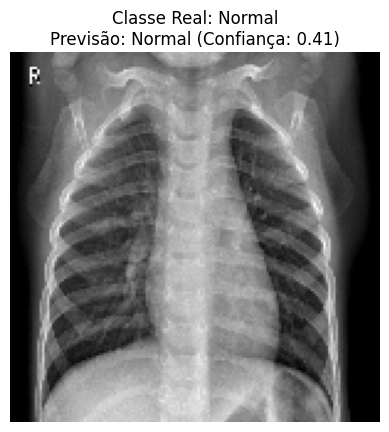

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


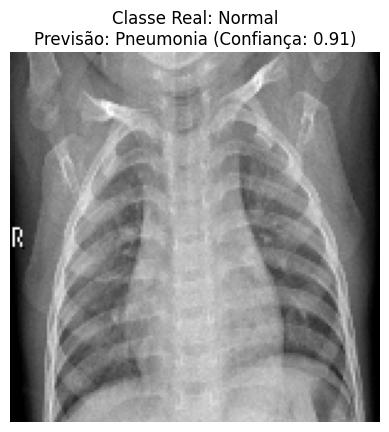

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


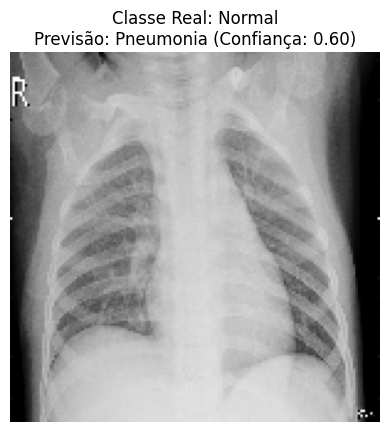

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


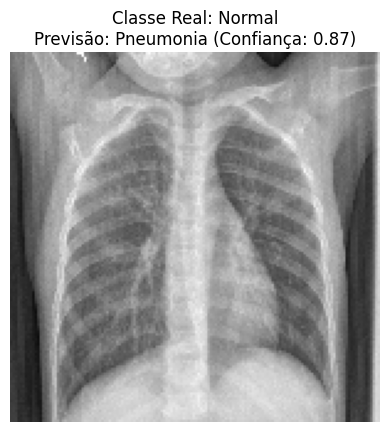

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


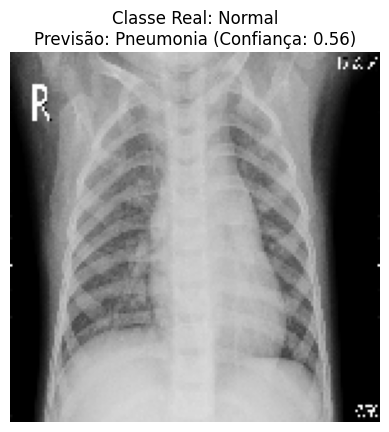

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


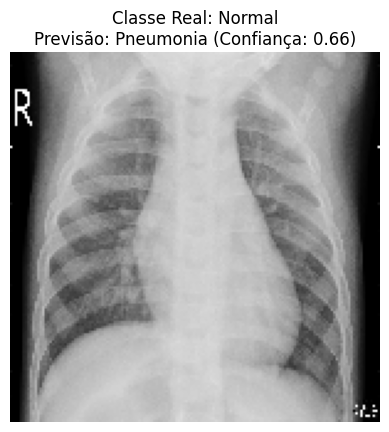

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


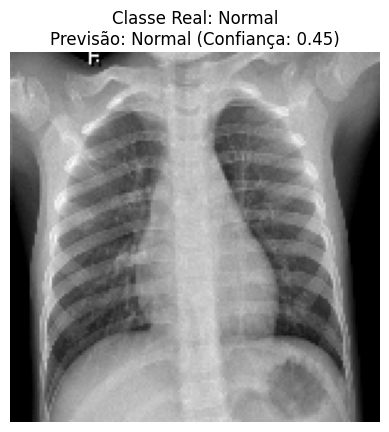

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


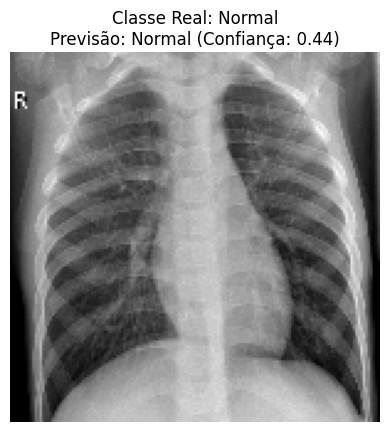

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


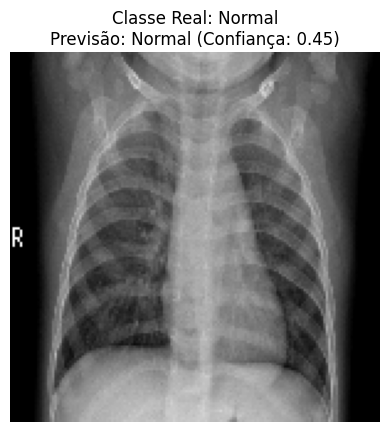

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


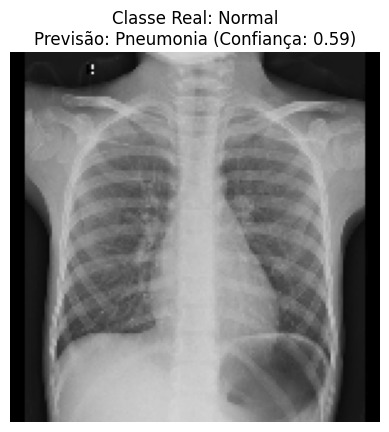

Imagens da classe PNEUMONIA:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


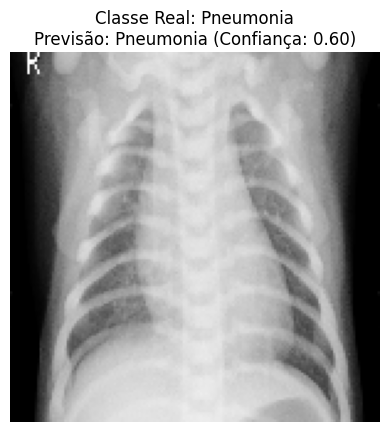

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


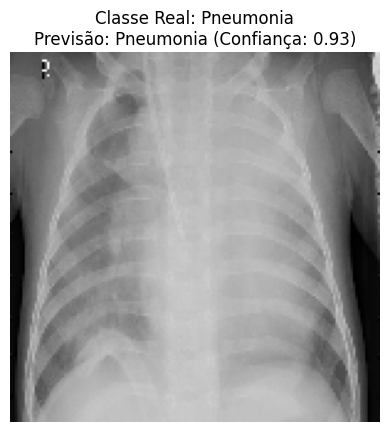

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


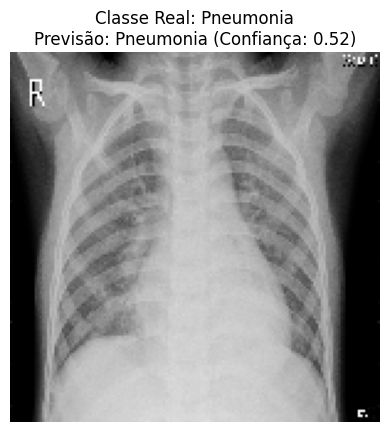

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


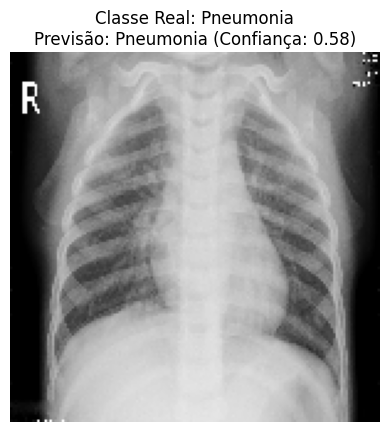

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


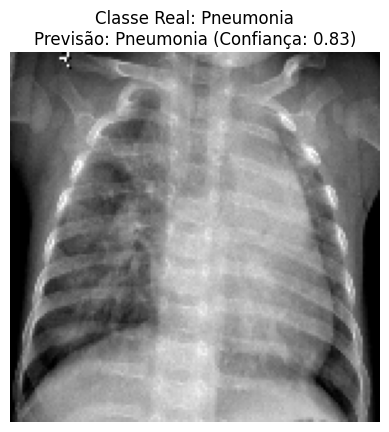

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


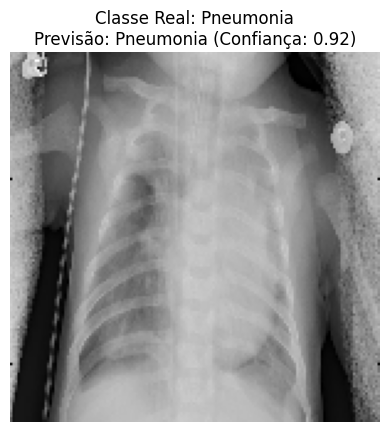

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


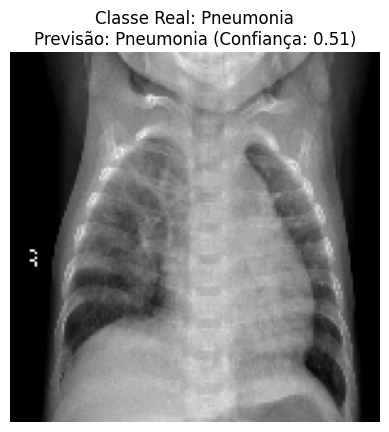

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


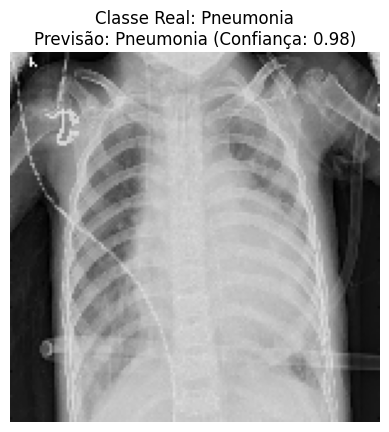

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


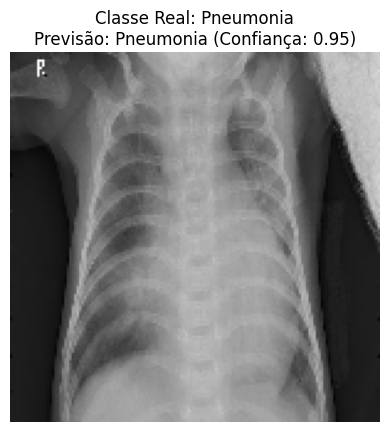

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


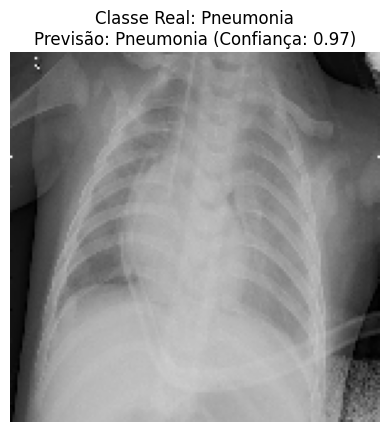

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Diretórios de teste
normal_dir = '/content/drive/MyDrive/RV/Projeto/test/NORMAL'
pneumonia_dir = '/content/drive/MyDrive/RV/Projeto/test/PNEUMONIA'

# Configurações
num_images_per_class = 10
target_size = (150, 150)

# Função para carregar imagens aleatórias e fazer previsões
def predict_and_show_images(model, img_paths, true_label):
    for img_path in img_paths:
        # Carrega e processa a imagem
        img = load_img(img_path, target_size=target_size)
        img_array = img_to_array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0)

        # Faz a previsão
        prediction = model.predict(img_array)
        predicted_label = "Pneumonia" if prediction[0] > 0.5 else "Normal"
        confidence = prediction[0][0]

        # Exibe a imagem com as informações
        plt.imshow(img)
        plt.title(
            f"Classe Real: {true_label}\n"
            f"Previsão: {predicted_label} (Confiança: {confidence:.2f})"
        )
        plt.axis('off')
        plt.show()
# def predict_and_show_images(model, img_paths, true_label, layer_name="conv2d_5"):
#     for img_path in img_paths:
#         # Carrega e processa a imagem
#         img = load_img(img_path, target_size=target_size)
#         img_array = img_to_array(img) / 255.0
#         img_array_expanded = np.expand_dims(img_array, axis=0)

#         # Faz a previsão
#         prediction = model.predict(img_array_expanded)
#         predicted_label = "Pneumonia" if prediction[0] > 0.5 else "Normal"
#         confidence = prediction[0][0]

#         # Gera o Grad-CAM
#         heatmap = grad_cam(model, img_array_expanded, layer_name=layer_name)
#         img_with_heatmap = overlay_heatmap(heatmap, (img * 255).astype("uint8"))

#         # Exibe a imagem com as informações
#         plt.imshow(img_with_heatmap)
#         plt.title(
#             f"Classe Real: {true_label}\n"
#             f"Previsão: {predicted_label} (Confiança: {confidence:.2f})"
#         )
#         plt.axis('off')
#         plt.show()

# Selecionar aleatoriamente 10 imagens de cada classe
normal_images = np.random.choice(os.listdir(normal_dir), num_images_per_class, replace=False)
pneumonia_images = np.random.choice(os.listdir(pneumonia_dir), num_images_per_class, replace=False)

# Caminhos completos das imagens
normal_paths = [os.path.join(normal_dir, img) for img in normal_images]
pneumonia_paths = [os.path.join(pneumonia_dir, img) for img in pneumonia_images]

# Mostrar previsões para cada classe
print("Imagens da classe NORMAL:")
predict_and_show_images(modelo, normal_paths, "Normal")

print("Imagens da classe PNEUMONIA:")
predict_and_show_images(modelo, pneumonia_paths, "Pneumonia")
